<a href="https://colab.research.google.com/github/MilagrosContrera/Gradient-descent/blob/main/Extra_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matyas function

I tried another function, using the same code, just modifying the part corresponding to the function, the learning rate, the number of iterations and the inicial point.

I used the Matyas function.

Formula:

$$f(x,y)= 0.26(x^2+y^2)-0.48xy$$

Global minimum:
$$f(0,0)=0$$

In [2]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Function to be optimized
# Function Matyas
def f_matyas(x, y):
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y

# Gradient
def df_matyas(x, y):
    df_dx = 0.52 * x - 0.48 * y
    df_dy = 0.52 * y - 0.48 * x
    return np.array([df_dx, df_dy])

# Function to calculate gradient descent
def gradient_descent(xy_point, learning_rate, num_iterations):
    points = [xy_point]
    for _ in range(num_iterations):
        gradient = df_matyas(xy_point[0], xy_point[1])
        xy_point = xy_point - learning_rate * gradient
        points.append(xy_point)
    return np.array(points)

# Create a grid of points for the surface
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f_matyas(X, Y)

# Incial Point
x_ini, y_ini = -6.0, 8.0
z_ini = f_matyas(x_ini, y_ini)




In [5]:
#  Run the gradient descent
points = gradient_descent(np.array([x_ini, y_ini]),
                          learning_rate=0.5,
                          num_iterations=150)

# Get the function values ​​at the found points
z_points = f_matyas(points[:, 0], points[:, 1])


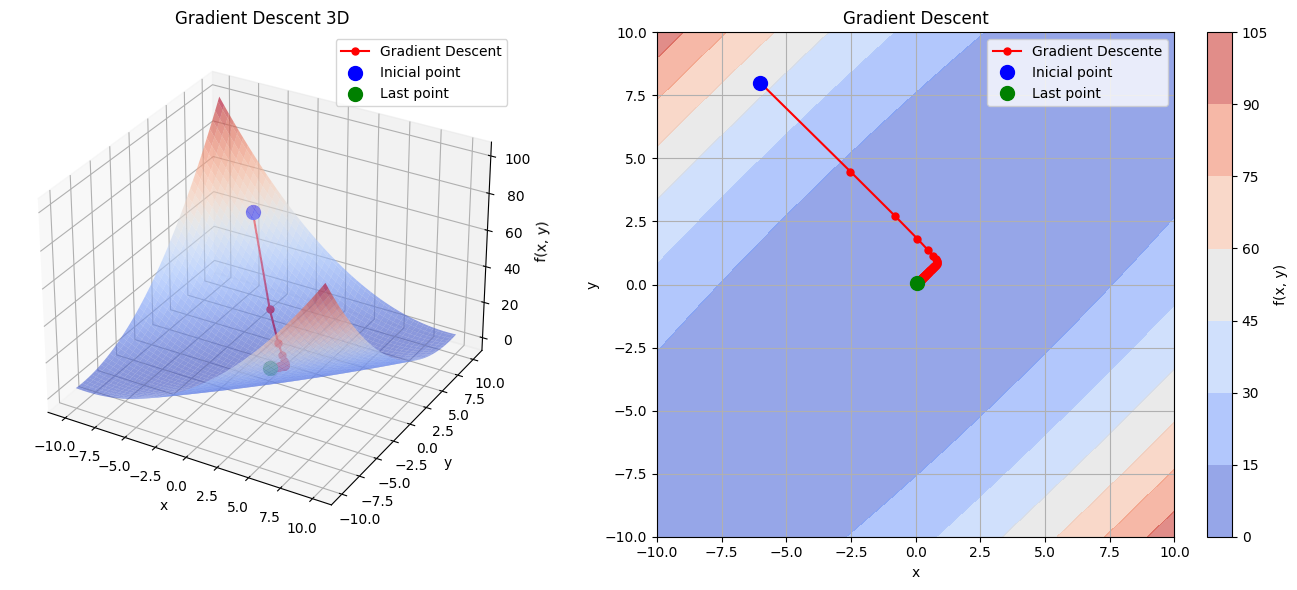

In [8]:
# Plot the results
# Graphing the function and gradient descent in 3D
fig = plt.figure(figsize=(14, 6))

#  3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.6)
ax1.plot(points[:, 0], points[:, 1], z_points, 'ro-', label="Gradient Descent", markersize=5)
ax1.scatter(x_ini, y_ini, z_ini, color='blue', s=100, label="Inicial point")
ax1.scatter(points[-1, 0], points[-1, 1], z_points[-1], color='green', s=100, label="Last point")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title("Gradient Descent 3D")
ax1.legend()

# 2D
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, cmap='coolwarm', alpha=0.6)
plt.colorbar(contour, ax=ax2, label='f(x, y)')
ax2.plot(points[:, 0], points[:, 1], 'ro-', label="Gradient Descente", markersize=5)
ax2.plot(x_ini, y_ini, 'bo', markersize=10, label="Inicial point")
ax2.plot(points[-1, 0], points[-1, 1], 'go', markersize=10, label="Last point")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("Gradient Descent")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [7]:
#Last point
points[-1, 0], points[-1, 1]

(0.04829602124348768, 0.04829602124348768)

It is close to the global minimum, but it is not exactly the global minimum. The exact minimum of the Matyas function is (0,0)

# Conclusions
When running this example, I could see that this function required a higher learning rate, and a higher number of iterations than the Sphere function to find a local minimum.

References
  *  Wikipedia contributors. (2023, December 29). Test functions for optimization. Wikipedia. https://en.wikipedia.org/wiki/Test_functions_for_optimization
